In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir

In [13]:
SEQN = 0
RECV = 1
TIME = 2
ADDR = 3
RSSI = 4
CHNL = 6

In [125]:
def plot_rate(ch, orien, txp, plt_obj):
    dirpath_list = ["data", "hanger", ch, orien, txp]
    dirpath = '/'.join(dirpath_list)
    '''
    fList=[]
    for file in listdir(dirpath):
        if file.endswith(".csv"):
            fList.append(file)
    print(fList)
    '''
    if txp == 'p8':
        TXpower = 'TX Power: 8 dBm'
    else:
        TXpower = 'TX Power: -40 dBm'
        
    fList=['0.csv', '2.csv', '4.csv', '6.csv', '8.csv']
    
    avgRate = []
    for f in fList:
        nDevices = int(f.split('.')[0])
        record = pd.read_csv(dirpath + '/' +f, header=None).values # no header
        for i, row in zip(range(record.shape[0]), record):
            record[i,SEQN] = int(row[SEQN].split()[1])
            record[i,ADDR] = int(row[ADDR].split(':')[5])

        target = record[record[:,ADDR] == 0]
        pkt_cnt = [0]
        
        if target.shape[0] != 0:
            bound = list(range(target[0, SEQN]+60, target[-1, SEQN]+1, 60))
            start = 0

            for b in bound:
                pkt_cnt.append(target[target[:,SEQN]<b].shape[0])
            pkt_cnt = np.diff(pkt_cnt)
        #print(pkt_cnt)
        avgRate.append(np.mean(pkt_cnt))


    print(avgRate)
    
    plt_obj.plot(range(0,9,2), avgRate, '-x', label=TXpower)


In [108]:
def plot_rssi(ch, orien, txp, plt_obj):
    dirpath_list = ["data", "hanger", ch, orien, txp]
    dirpath = '/'.join(dirpath_list)
    '''
    fList=[]
    for file in listdir(dirpath):
        if file.endswith(".csv"):
            fList.append(file)
    print(fList)
    '''
    if txp == 'p8':
        TXpower = 'TX Power: 8 dBm'
    else:
        TXpower = 'TX Power: -40 dBm'
        
    fList=['0.csv', '2.csv', '4.csv', '6.csv', '8.csv']
    
    avgRssi = []
    for f in fList:
        nDevices = int(f.split('.')[0])
        record = pd.read_csv(dirpath + '/' +f, header=None).values # no header
        for i, row in zip(range(record.shape[0]), record):
            record[i,SEQN] = int(row[SEQN].split()[1])
            record[i,ADDR] = int(row[ADDR].split(':')[5])

        target = record[record[:,ADDR] == 0]
        if target.shape[0] == 0:
            avgRssi.append(None)
        else:
            avgRssi.append(np.mean(target[:,RSSI]))


    print(avgRssi)
    
    plt_obj.plot(range(0,9,2), avgRssi, '-x', label=TXpower)


### Rate

[25.666666666666668, 28.0, 27.0, 28.6, 27.8]
[28.0, 11.0, 16.0, 10.333333333333334, 8.333333333333334]


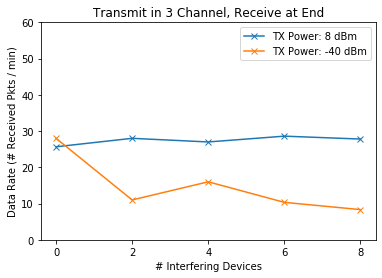

In [126]:
# ch3, end
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot_rate("ch3", "end", "p8", ax)
plot_rate("ch3", "end", "p_40",ax)

ax.set_title("Transmit in 3 Channel, Receive at End")
ax.set_xlabel('# Interfering Devices')
ax.set_ylabel('Data Rate (# Received Pkts / min)')
ax.set_ylim(0, 60)
ax.set_xticks(range(0,9,2))
ax.legend()

[25.5, 29.0, 27.666666666666668, 27.666666666666668, 29.333333333333332]
[4.0, 9.333333333333334, 8.333333333333334, 7.5, 1.0]


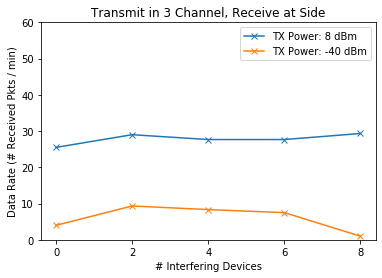

In [127]:
# ch3, side
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot_rate("ch3", "side", "p8", ax)
plot_rate("ch3", "side", "p_40",ax)

ax.set_title("Transmit in 3 Channel, Receive at Side")
ax.set_xlabel('# Interfering Devices')
ax.set_ylabel('Data Rate (# Received Pkts / min)')
ax.set_ylim(0, 60)
ax.set_xticks(range(0,9,2))
ax.legend()

[9.666666666666666, 11.5, 10.0, 9.333333333333334, 7.666666666666667]
[9.2, 6.8, 3.1739130434782608, 3.7, 6.0]


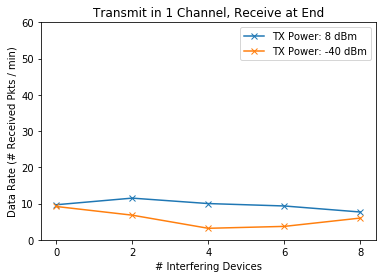

In [128]:
# ch1, end
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot_rate("ch1", "end", "p8", ax)
plot_rate("ch1", "end", "p_40",ax)

ax.set_title("Transmit in 1 Channel, Receive at End")
ax.set_xlabel('# Interfering Devices')
ax.set_ylabel('Data Rate (# Received Pkts / min)')
ax.set_ylim(0, 60)
ax.set_xticks(range(0,9,2))
ax.legend()

[8.333333333333334, 8.666666666666666, 10.5, 9.666666666666666, 7.666666666666667]
[7.666666666666667, 8.333333333333334, 0.0, 3.5, 0.5357142857142857]


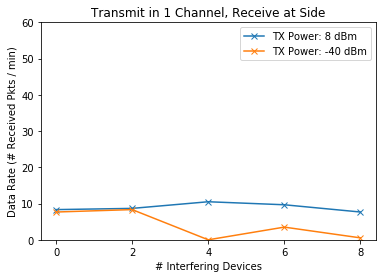

In [130]:
# ch1, side
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot_rate("ch1", "side", "p8", ax)
plot_rate("ch1", "side", "p_40",ax)

ax.set_title("Transmit in 1 Channel, Receive at Side")
ax.set_xlabel('# Interfering Devices')
ax.set_ylabel('Data Rate (# Received Pkts / min)')
ax.set_ylim(0, 60)
ax.set_xticks(range(0,9,2))
ax.legend()

### RSSI

[-19.245098039215687, -43.205714285714286, -34.82, -34.617283950617285, -35.43448275862069]
[-62.98850574712644, -85.20588235294117, -80.11538461538461, -80.59375, -83.74074074074075]


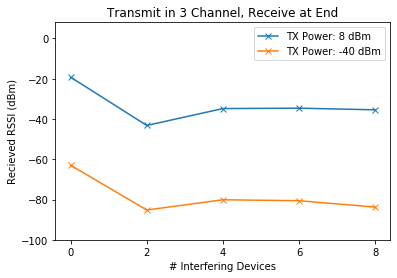

In [131]:
# ch3, end
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot_rssi("ch3", "end", "p8", ax)
plot_rssi("ch3", "end", "p_40",ax)

ax.set_title("Transmit in 3 Channel, Receive at End")
ax.set_xlabel('# Interfering Devices')
ax.set_ylabel('Recieved RSSI (dBm)')
ax.set_ylim(-100, 8)
ax.set_xticks(range(0,9,2))
ax.legend()

[-40.109756097560975, -44.43956043956044, -39.67857142857143, -49.3921568627451, -41.03225806451613]
[-84.38461538461539, -82.33333333333333, -83.5, -84.34782608695652, -87.33333333333333]


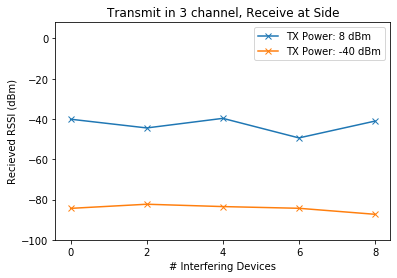

In [110]:
# ch3, side
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot_rssi("ch3", "side", "p8", ax)
plot_rssi("ch3", "side", "p_40",ax)

ax.set_title("Transmit in 3 channel, Receive at Side")
ax.set_xlabel('# Interfering Devices')
ax.set_ylabel('Recieved RSSI (dBm)')
ax.set_ylim(-100, 8)
ax.set_xticks(range(0,9,2))
ax.legend()

[-17.0, -31.84375, -33.0, -33.0, -38.125]
[-67.0, -82.6, -80.43373493975903, -85.8157894736842, -84.16129032258064]


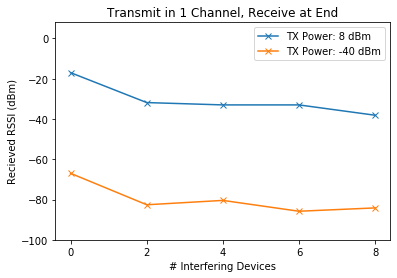

In [132]:
# ch1, end
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot_rssi("ch1", "end", "p8", ax)
plot_rssi("ch1", "end", "p_40",ax)

ax.set_title("Transmit in 1 Channel, Receive at End")
ax.set_xlabel('# Interfering Devices')
ax.set_ylabel('Recieved RSSI (dBm)')
ax.set_ylim(-100, 8)
ax.set_xticks(range(0,9,2))
ax.legend()

[-35.7037037037037, -34.44444444444444, -35.625, -39.0, -48.125]
[-83.29166666666667, -80.4074074074074, None, -85.9090909090909, -86.14285714285714]


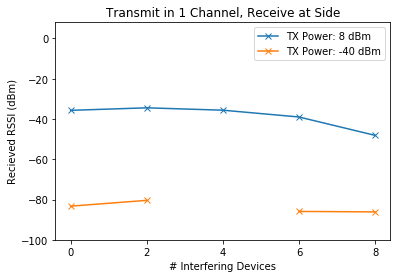

In [133]:
# ch1, side
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plot_rssi("ch1", "side", "p8", ax)
plot_rssi("ch1", "side", "p_40",ax)

ax.set_title("Transmit in 1 Channel, Receive at Side")
ax.set_xlabel('# Interfering Devices')
ax.set_ylabel('Recieved RSSI (dBm)')
ax.set_ylim(-100, 8)
ax.set_xticks(range(0,9,2))
ax.legend()

### Stack

In [53]:
plot_rate("ch1", "end", "p_40")

['6.csv', '4.csv', '0.csv', '2.csv', '8.csv']
[4 0 0 0 3 7 7 7 5 4]
[5 8 7 9 9 1 0 0 0 0 0 0 0 0 0 0 0 0 2 8 8 7 9]
[11 10  8  7 10]
[8 7 7 7 5]
[ 5  5  4 10]
[3.7, 3.1739130434782608, 9.2, 6.8, 6.0]
[-85.8157894736842, -80.43373493975903, -67.0, -82.6, -84.16129032258064]


In [47]:
plot_rate("ch1", "side", "p_40")

['6.csv', '4.csv', '0.csv', '2.csv', '8.csv']
[4 3]
[-1]
[12  5  6]
[9 9 7]
[2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 5 4]
[3.5, -1.0, 7.666666666666667, 8.333333333333334, 0.5357142857142857]
[-85.9090909090909, 'na', -83.29166666666667, -80.4074074074074, -86.14285714285714]


In [48]:
plot_rate("ch1", "end", "p8")

['6.csv', '4.csv', '0.csv', '2.csv', '8.csv']
[11  7 10]
[10 10]
[11  7 11]
[12 11]
[8 8 7]
[9.333333333333334, 10.0, 9.666666666666666, 11.5, 7.666666666666667]
[-33.0, -33.0, -17.0, -31.84375, -38.125]


In [49]:
plot_rate("ch1", "side", "p8")

['6.csv', '4.csv', '0.csv', '2.csv', '8.csv']
[12  7 10]
[12  9]
[9 7 9]
[10 10  6]
[7 8 8]
[9.666666666666666, 10.5, 8.333333333333334, 8.666666666666666, 7.666666666666667]
[-39.0, -35.625, -35.7037037037037, -34.44444444444444, -48.125]


In [50]:
plot_rate("ch3", "end", "p_40")

['6.csv', '4.csv', '0.csv', '2.csv', '8.csv']
[12  8 11]
[16 20 12]
[31 25 28]
[10  9 14]
[8 8 9]
[10.333333333333334, 16.0, 28.0, 11.0, 8.333333333333334]
[-80.59375, -80.11538461538461, -62.98850574712644, -85.20588235294117, -83.74074074074075]


In [51]:
plot_rate("ch3", "side", "p_40")

['6.csv', '4.csv', '0.csv', '2.csv', '8.csv']
[6 9]
[ 8 10  7]
[3 5]
[14  8  6]
[2 0]
[7.5, 8.333333333333334, 4.0, 9.333333333333334, 1.0]
[-84.34782608695652, -83.5, -84.38461538461539, -82.33333333333333, -87.33333333333333]


In [ ]:
plot_rssi("ch3", "end", "p8")
